In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('./sample-pitch-dat.csv')
data

,isstrike,IsLefthandedPitcher,IsLefthandedBatter,inning,balls,strikes,pitchtypeid,ReleaseSpeed,PlateX,PlateZ,ReleaseX,ReleaseZ,Extension,SpinRate,SpinDirection,X0,Y0,Z0,VerticalBreak,InducedVertBreak
0,0,0,0,4,1,0,3.0,84.176201,-0.947647,2.80999,-1.64554,5.68673,6.317667,2729.810547,100.834000,-1.64554,54.182333,5.68673,1.52138,1.848958
1,0,0,1,4,0,0,4.0,78.723999,0.083079,1.26807,-1.90141,6.26326,5.594790,2018.478271,247.065002,-1.90141,54.905210,6.26326,-8.41660,8.061367
2,1,0,1,4,1,0,4.0,78.960899,0.549537,2.28519,-1.89621,6.32559,5.706917,2149.946777,252.688995,-1.89621,54.793083,6.32559,-8.56763,6.416654
3,0,0,1,4,1,1,2.0,72.461998,-1.090870,1.80356,-2.00448,6.24622,5.675559,2881.498047,39.414799,-2.00448,54.824441,6.24622,7.95425,-14.410546
4,1,0,1,4,0,0,4.0,79.025002,0.416638,3.20862,-1.84773,6.30359,5.526476,2138.032715,235.791000,-1.84773,54.973524,6.30359,-6.79968,9.660092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142638,1,0,1,4,0,0,7.0,87.458900,0.717435,3.23138,-1.14418,5.62548,6.634398,2410.196289,147.781998,-1.14418,53.865602,5.62548,1.78129,6.306919
142639,0,0,1,4,0,1,1.0,94.308296,0.116368,1.12233,-1.21431,5.68419,6.621221,2311.268311,207.524994,-1.21431,53.878779,5.68419,-5.26588,19.157152
142640,0,0,1,7,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142641,0,0,1,7,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Assess Multicollinearity of features before binary classification

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_with_const = add_constant(data)
df_with_const

,const,isstrike,IsLefthandedPitcher,IsLefthandedBatter,inning,balls,strikes,pitchtypeid,ReleaseSpeed,PlateX,...,ReleaseX,ReleaseZ,Extension,SpinRate,SpinDirection,X0,Y0,Z0,VerticalBreak,InducedVertBreak
0,1.0,0,0,0,4,1,0,3.0,84.176201,-0.947647,...,-1.64554,5.68673,6.317667,2729.810547,100.834000,-1.64554,54.182333,5.68673,1.52138,1.848958
1,1.0,0,0,1,4,0,0,4.0,78.723999,0.083079,...,-1.90141,6.26326,5.594790,2018.478271,247.065002,-1.90141,54.905210,6.26326,-8.41660,8.061367
2,1.0,1,0,1,4,1,0,4.0,78.960899,0.549537,...,-1.89621,6.32559,5.706917,2149.946777,252.688995,-1.89621,54.793083,6.32559,-8.56763,6.416654
3,1.0,0,0,1,4,1,1,2.0,72.461998,-1.090870,...,-2.00448,6.24622,5.675559,2881.498047,39.414799,-2.00448,54.824441,6.24622,7.95425,-14.410546
4,1.0,1,0,1,4,0,0,4.0,79.025002,0.416638,...,-1.84773,6.30359,5.526476,2138.032715,235.791000,-1.84773,54.973524,6.30359,-6.79968,9.660092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142638,1.0,1,0,1,4,0,0,7.0,87.458900,0.717435,...,-1.14418,5.62548,6.634398,2410.196289,147.781998,-1.14418,53.865602,5.62548,1.78129,6.306919
142639,1.0,0,0,1,4,0,1,1.0,94.308296,0.116368,...,-1.21431,5.68419,6.621221,2311.268311,207.524994,-1.21431,53.878779,5.68419,-5.26588,19.157152
142640,1.0,0,0,1,7,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142641,1.0,0,0,1,7,2,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#using variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Variable'] = df_with_const.dropna().columns
vif_data['VIF'] = [variance_inflation_factor(df_with_const.dropna().values, i) for i in range(df_with_const.shape[1])]
vif_data

/Users/jaredperez/opt/miniconda3/envs/infinity/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/jaredperez/opt/miniconda3/envs/infinity/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,const,0.000000e+00
1,isstrike,1.103190e+00
2,IsLefthandedPitcher,7.781694e+00
3,IsLefthandedBatter,1.097585e+00
4,inning,1.021904e+00
5,balls,1.143146e+00
6,strikes,1.247079e+00
7,pitchtypeid,1.209498e+00
8,ReleaseSpeed,2.540140e+00
9,PlateX,1.177711e+00


- High VIF values in trillions and Infinity indicate high multi-collinearity

In [5]:
data.corr().style.background_gradient(cmap = 'coolwarm')

,isstrike,IsLefthandedPitcher,IsLefthandedBatter,inning,balls,strikes,pitchtypeid,ReleaseSpeed,PlateX,PlateZ,ReleaseX,ReleaseZ,Extension,SpinRate,SpinDirection,X0,Y0,Z0,VerticalBreak,InducedVertBreak
isstrike,1.000000,0.001048,-0.010693,-0.013438,-0.032388,-0.283956,-0.036900,0.028630,-0.032994,0.092877,-0.000993,-0.000232,-0.011679,0.032492,-0.000654,-0.000993,0.011331,-0.000232,-0.001283,0.038058
IsLefthandedPitcher,0.001048,1.000000,-0.168098,-0.054219,-0.004566,0.002097,-0.015128,-0.113278,-0.081773,0.011765,0.921500,0.024221,-0.043047,-0.065879,0.040423,0.921500,0.044454,0.024221,0.378388,0.024753
IsLefthandedBatter,-0.010693,-0.168098,1.000000,0.000855,0.028088,-0.010393,-0.005210,0.021360,-0.222860,0.044399,-0.150731,-0.011522,-0.014550,-0.034602,0.080444,-0.150731,0.013858,-0.011522,-0.152313,0.003168
inning,-0.013438,-0.054219,0.000855,1.000000,0.012614,-0.001039,-0.003950,0.038871,0.002116,0.010842,-0.047089,-0.102109,0.020083,0.035642,-0.012005,-0.047089,-0.019006,-0.102109,-0.006224,-0.025830
balls,-0.032388,-0.004566,0.028088,0.012614,1.000000,0.323196,0.001619,0.083296,-0.002940,-0.019153,-0.002168,-0.021686,0.036902,-0.028402,0.042168,-0.002168,-0.037143,-0.021686,-0.039645,0.071647
strikes,-0.283956,0.002097,-0.010393,-0.001039,0.323196,1.000000,0.019406,-0.021859,0.051214,-0.107686,0.008812,-0.018309,0.036049,0.015492,-0.017694,0.008812,-0.035685,-0.018309,0.019087,-0.067316
pitchtypeid,-0.036900,-0.015128,-0.005210,-0.003950,0.001619,0.019406,1.000000,-0.154711,0.001406,-0.165202,-0.014609,-0.078147,-0.039482,-0.286972,0.094096,-0.014609,0.038730,-0.078147,-0.077428,-0.195806
ReleaseSpeed,0.028630,-0.113278,0.021360,0.038871,0.083296,-0.021859,-0.154711,1.000000,-0.035918,0.244981,-0.108917,0.070918,0.133952,-0.028372,0.278319,-0.108917,-0.134926,0.070918,-0.316605,0.741928
PlateX,-0.032994,-0.081773,-0.222860,0.002116,-0.002940,0.051214,0.001406,-0.035918,1.000000,-0.202031,-0.049804,0.011943,0.053267,0.098361,-0.205572,-0.049804,-0.052150,0.011943,0.186341,-0.054997
PlateZ,0.092877,0.011765,0.044399,0.010842,-0.019153,-0.107686,-0.165202,0.244981,-0.202031,1.000000,0.015753,0.033051,-0.072118,-0.011686,0.091856,0.015753,0.070445,0.033051,-0.058532,0.304855


- Perfect correlation between (X0 and ReleaseX), (Z0 and releaseZ), and perfect negative correlation between (extension and Y0) means likely repeated values

In [6]:
print((data['X0'].dropna()==data['ReleaseX'].dropna()).unique())
print((data['Z0'].dropna()==data['ReleaseZ'].dropna()).unique())

[ True]
[ True]


<Axes: xlabel='Extension', ylabel='Y0'>

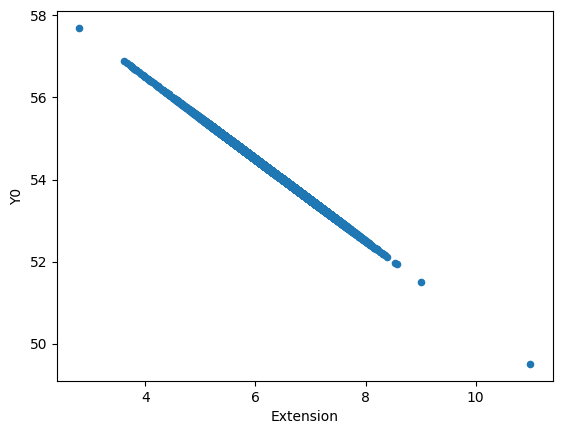

In [7]:
data[['Extension', 'Y0']].plot(kind='scatter', x='Extension', y= 'Y0')

In [8]:
# Drop repeated columns (and highly correlated y0 column)
data = data.drop(columns = ['X0', 'Z0', 'Y0'])
data

,isstrike,IsLefthandedPitcher,IsLefthandedBatter,inning,balls,strikes,pitchtypeid,ReleaseSpeed,PlateX,PlateZ,ReleaseX,ReleaseZ,Extension,SpinRate,SpinDirection,VerticalBreak,InducedVertBreak
0,0,0,0,4,1,0,3.0,84.176201,-0.947647,2.80999,-1.64554,5.68673,6.317667,2729.810547,100.834000,1.52138,1.848958
1,0,0,1,4,0,0,4.0,78.723999,0.083079,1.26807,-1.90141,6.26326,5.594790,2018.478271,247.065002,-8.41660,8.061367
2,1,0,1,4,1,0,4.0,78.960899,0.549537,2.28519,-1.89621,6.32559,5.706917,2149.946777,252.688995,-8.56763,6.416654
3,0,0,1,4,1,1,2.0,72.461998,-1.090870,1.80356,-2.00448,6.24622,5.675559,2881.498047,39.414799,7.95425,-14.410546
4,1,0,1,4,0,0,4.0,79.025002,0.416638,3.20862,-1.84773,6.30359,5.526476,2138.032715,235.791000,-6.79968,9.660092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142638,1,0,1,4,0,0,7.0,87.458900,0.717435,3.23138,-1.14418,5.62548,6.634398,2410.196289,147.781998,1.78129,6.306919
142639,0,0,1,4,0,1,1.0,94.308296,0.116368,1.12233,-1.21431,5.68419,6.621221,2311.268311,207.524994,-5.26588,19.157152
142640,0,0,1,7,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142641,0,0,1,7,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Removed extraneous columns which simply provided redundant information

array([[<Axes: title={'center': 'isstrike'}>,
        <Axes: title={'center': 'IsLefthandedPitcher'}>,
        <Axes: title={'center': 'IsLefthandedBatter'}>,
        <Axes: title={'center': 'inning'}>],
       [<Axes: title={'center': 'balls'}>,
        <Axes: title={'center': 'strikes'}>,
        <Axes: title={'center': 'pitchtypeid'}>,
        <Axes: title={'center': 'ReleaseSpeed'}>],
       [<Axes: title={'center': 'PlateX'}>,
        <Axes: title={'center': 'PlateZ'}>,
        <Axes: title={'center': 'ReleaseX'}>,
        <Axes: title={'center': 'ReleaseZ'}>],
       [<Axes: title={'center': 'Extension'}>,
        <Axes: title={'center': 'SpinRate'}>,
        <Axes: title={'center': 'SpinDirection'}>,
        <Axes: title={'center': 'VerticalBreak'}>],
       [<Axes: title={'center': 'InducedVertBreak'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

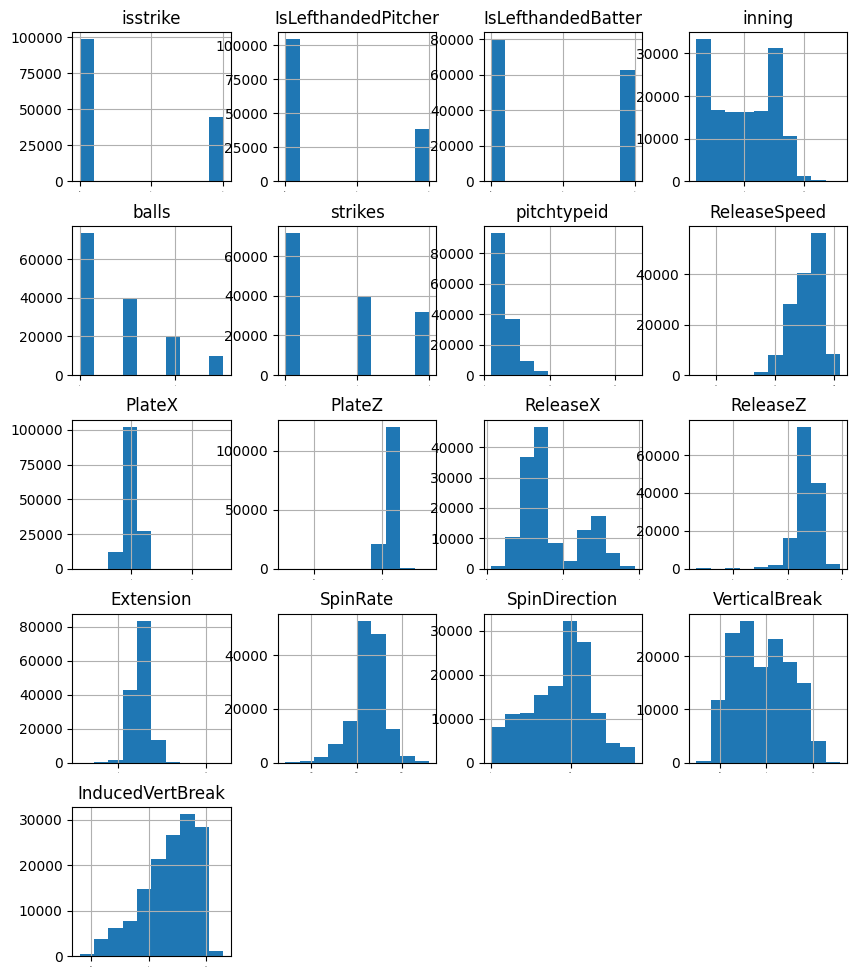

In [9]:
data.hist(xlabelsize=0.1, figsize=(10,12))

## Histogram Insights

- Unbalanced Strike/Ball data

- More righty ptichers

- Unbalanced pitchTypeId

- Not a lot of normally distributed data

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [11]:
#Dropna for all models (could alterntaively impute but for simplicity will just drop)
data = data.dropna()

In [12]:
y = data['isstrike']
X= data.drop(columns= 'isstrike')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7)

- Going to try a few different models

- Picked a Lasso regression model if relationship is linear

- Also picked Random Forest to use ensemble decision tree and XG Boost

In [13]:
reg = LassoCV()
reg.fit(X,y)

LassoCV()

In [14]:
reg.score(X, y)

0.09231582233642432

- Awfully weak linear relationship

In [15]:
rl_clf = RandomForestClassifier(n_estimators=80, n_jobs=-1)
rl_clf.fit(X_train, y_train)
rl_clf.score(X_test,y_test)

0.9287804680458932

- Score from Random Forest is very promising

- model predicts strike accuracy with 93% accuracy

In [16]:
print(rl_clf.classes_)
predictions = rl_clf.predict_proba(X_test)
predictions

[0 1]


array([[0.2875, 0.7125],
       [1.    , 0.    ],
       [0.95  , 0.05  ],
       ...,
       [0.0375, 0.9625],
       [0.9875, 0.0125],
       [0.9875, 0.0125]])

Precision_Score:  0.8886257461718142
Recall_Score:  0.8838372430705689
F1_Score:  0.8862250262881178


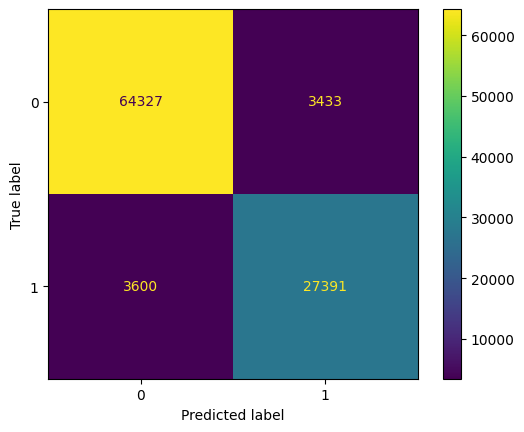

In [17]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

y_pred = rl_clf.predict(X_test)
print('Precision_Score: ', precision_score(y_test, y_pred))
print('Recall_Score: ', recall_score(y_test, y_pred))
print('F1_Score: ', f1_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=rl_clf.classes_).plot()

In [49]:
data['isstrike'].loc[y_test.index].values

array([0, 1, 0, ..., 0, 1, 1])

In [51]:
predictions = pd.DataFrame(predictions, columns=['Ball Probability', 'Strike Probability'])
predictions['Actual'] = data['isstrike'].loc[y_test.index].values
predictions

,Ball Probability,Strike Probability,Actual
0,1.0000,0.0000,0
1,0.0375,0.9625,1
2,0.8375,0.1625,0
3,0.9875,0.0125,0
4,1.0000,0.0000,0
...,...,...,...
98746,0.9875,0.0125,0
98747,0.9750,0.0250,0
98748,1.0000,0.0000,0
98749,0.0375,0.9625,1


## Above is the way I would predict probability of strike and present it